<a href="https://colab.research.google.com/github/AliKhyar/Self-Driving-Car/blob/master/traffic%20signs/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!ls

german-traffic-signs  sample_data


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D    
import random
import pickle
import cv2

In [0]:
random.seed(0)

our data in /kaggle/input are pickle files, so we should unpickle them

In [12]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [13]:
with open('german-traffic-signs/train.p','rb') as f:
    train_data = pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
    valid_data = pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
    test_data = pickle.load(f)

type(train_data)

dict

In [14]:
print(f"train_data: {train_data.keys()}")
print(f"valid_data: {valid_data.keys()}")
print(f"test_data: {test_data.keys()}")

train_data: dict_keys(['coords', 'labels', 'features', 'sizes'])
valid_data: dict_keys(['coords', 'labels', 'features', 'sizes'])
test_data: dict_keys(['sizes', 'coords', 'features', 'labels'])


In [15]:
X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
print("X train shape:",X_train.shape)
print("y train shape:",y_train.shape)

print("X train shape:",X_valid.shape)
print("y valid shape:",y_valid.shape)

print("X test shape:",X_test.shape)
print("y test shape:",y_test.shape)

X train shape: (34799, 32, 32, 3)
y train shape: (34799,)
X train shape: (4410, 32, 32, 3)
y valid shape: (4410,)
X test shape: (12630, 32, 32, 3)
y test shape: (12630,)


In [16]:
print(X_train.shape[0] == y_train.shape[0])
print(X_valid.shape[0] == y_valid.shape[0])
print(X_test.shape[0] == y_test.shape[0])



True
True
True


In [17]:
data = pd.read_csv("german-traffic-signs/signnames.csv")
data.head()


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [18]:
data.tail()
x_selected = X_train[y_train == 10][1,:,:,:]
x_selected.shape

(32, 32, 3)

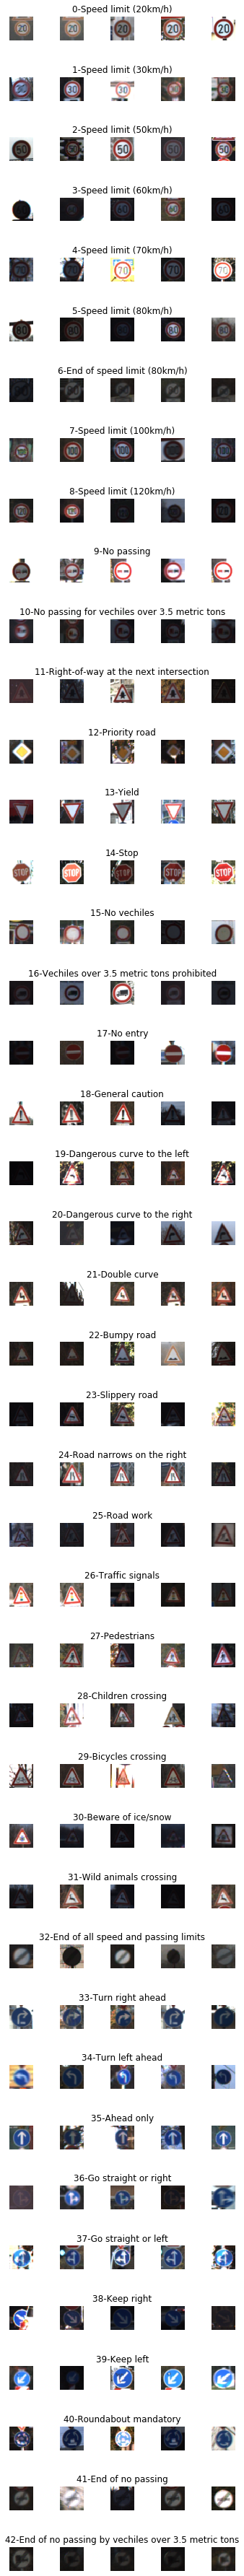

In [19]:
num_of_samples = []
cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),: ,:],cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i ==2:
            axs[j][i].set_title(str(j)+'-'+ row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

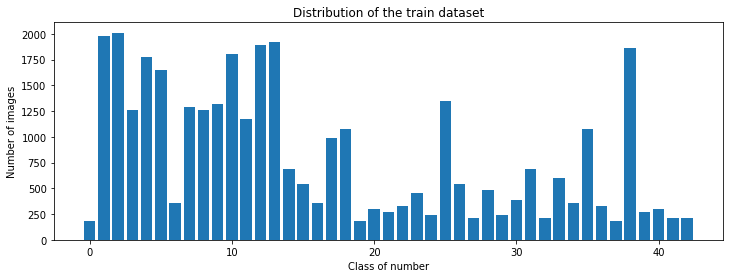

In [20]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the train dataset")

plt.xlabel("Class of number")
plt.ylabel("Number of images")

(32, 32, 3)


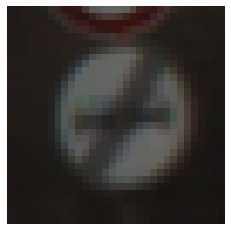

In [21]:
plt.imshow(X_train[12])
plt.axis("off")
print(X_train[123].shape)

In [0]:
def preprocessing(img):
    #gray scale
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # equalize the pixels
    img = cv2.equalizeHist(img)
    return img


In [0]:
X_train = np.array(list(map(preprocessing,X_train)),dtype=np.uint8)
X_valid = np.array(list(map(preprocessing,X_valid)),dtype=np.uint8)
X_test = np.array(list(map(preprocessing,X_test)),dtype=np.uint8)

(-0.5, 31.5, 31.5, -0.5)

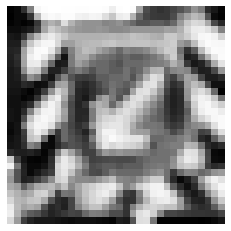

In [24]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)], cmap=plt.get_cmap('gray'))
plt.axis("off")


In [25]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


(34799, 32, 32)
(4410, 32, 32)
(12630, 32, 32)


In [26]:

X_train = X_train.reshape(34799, 32, 32,1)
X_valid = X_valid.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_valid = to_categorical(y_valid,43)

In [0]:
def model():
    model = Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
    model.add(Conv2D(60,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [29]:
model = model()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0        

In [30]:
h = model.fit(X_train,y_train,epochs=10, validation_data=(X_valid,y_valid),batch_size=400, verbose=1,shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34799 samples, validate on 4410 samples
Epoch 1/10





34799/34799 [==============================] - 16s 467us/step - loss: 3.8013 - acc: 0.1908 - val_loss: 1.8756 - val_acc: 0.5413
Epoch 2/10
34799/34799 [==============================] - 2s 49us/step - loss: 1.5675 - acc: 0.5415 - val_loss: 0.6574 - val_acc: 0.8268
Epoch 3/10
34799/34799 [==============================] - 2s 49us/step - loss: 0.9207 - acc: 0.7179 - val_loss: 0.3758 - val_acc: 0.9054
Epoch 4/10
34799/34799 [==============================] - 2s 50us/step - loss: 0.6555 - acc: 0.7961 - val_loss: 0.2422 - val_acc: 0.9324
Epoch 5/10
34799/34799 [==============================] - 2s 49us/step - loss: 0.4959 - acc: 0.8450 - val_loss: 0.2005 - val_acc: 0.9490
Epoch 6/10
34799/34799 [==============================] - 2s 49us/step - loss: 0.3930 - acc: 0.8792 - val_loss: 0.1668 - val_acc: 0.9537
Epoch 7/10
34799/34799 [=

Text(0.5, 0, 'epochs')

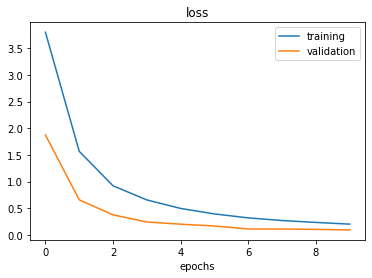

In [31]:

p1, = plt.plot(h.history['loss'],label='training')
p2, = plt.plot(h.history['val_loss'], label='validation')
plt.legend(handles=[p1, p2])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

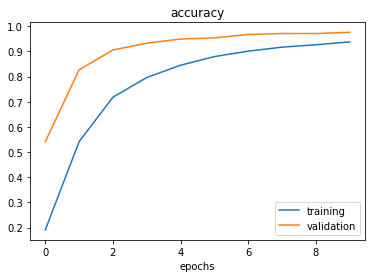

In [32]:

p1, = plt.plot(h.history['acc'],label='training')
p2, = plt.plot(h.history['val_acc'], label='validation')
plt.legend(handles=[p1, p2])
plt.title('accuracy')
plt.xlabel('epochs')

In [33]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(f'score: {score[0]}')
print(f'accuracy: {score[1]}')

score: 0.19090886529555703
accuracy: 0.9466349960317332
